# Pre-trained word embedding - Word2Vec vs Glove

# 1. Embedding Visulization

## 1.1. Preparing data for Word2Vec

In [8]:
#nltk.download('punkt')

max_features = 2000
max_length = 40

import collections
import numpy as np
import os 
import nltk

maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join("data/umich-sentiment-train.txt"), 'rb')
for line in ftrain:
    label, sentence = line.decode('utf8').strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()

In [9]:
vocab = [v for v, _ in word_freqs.most_common(max_features)]

sentences = np.empty((num_recs, ), dtype=list)
i = 0
ftrain = open(os.path.join("data/umich-sentiment-train.txt"), 'rb')

for line in ftrain:
    label, sentence = line.decode('utf8').strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    sentence = []
    for word in words:
        if word in vocab:
            sentence.append(word)
        else:
            sentence.append("UNK")
    sentences[i] = sentence
    i += 1
    
ftrain.close()

sentences=list(sentences)

In [12]:
from gensim.models import Word2Vec
EMBEDDING_SIZE=128
embed_model = Word2Vec(sentences, sg=1, size=EMBEDDING_SIZE, window=5, min_count=1)

In [13]:
embed_model.most_similar('horrible')

C:\Users\Hyunsil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Hyunsil\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('such', 0.99506014585495),
 ('ok', 0.8762369751930237),
 ('horrible..', 0.8366900682449341),
 ('terrible', 0.822128415107727),
 ('movie..', 0.804338812828064),
 ('an', 0.8030545115470886),
 ('oh', 0.8023256659507751),
 ('pretty', 0.792742133140564),
 ('awful', 0.7902345657348633),
 ('freaking', 0.7866713404655457)]

In [14]:
embedding_matrix = embed_model.wv.vectors
embedding_matrix.shape

(2001, 128)

In [16]:
index2word = {i+1: w for i, w in enumerate(embed_model.wv.index2word)} 
index2word[0] = 'PAD'
word2index = {w: i for i, w in index2word.items() }

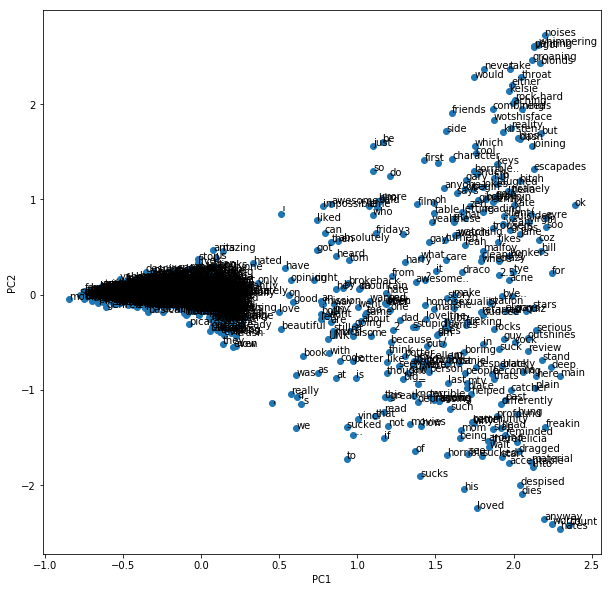

In [17]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca=PCA(n_components=2)
weight_pc=pca.fit_transform(embedding_matrix)

fig = plt.figure(figsize=(10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(weight_pc[:, 0], weight_pc[:, 1])

words = list(index2word.values())[1:]
for i, word in enumerate(words):
    plt.annotate(word, xy=(weight_pc[i, 0], weight_pc[i, 1]))
plt.show()